# Reproduction

This notebook aims to reproduce Figure 3 from Anagnostou et al. 2022.

## Set-up

Import required packages

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
import os
import numpy as np

Set file paths

In [10]:
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and database.'''

    outputs = './output'
    model = 'OUT_STATS.csv'


paths = Paths()

In [11]:
data = pd.read_csv(os.path.join(paths.outputs, paths.model))
data.head()

,day-mean,day-s,day-sd,day-ci,emArrivals-mean,emArrivals-s,emArrivals-sd,emArrivals-ci,elArrivals-mean,elArrivals-s,...,zone7-available-sd,zone7-available-ci,zone8-type-mean,zone8-type-s,zone8-type-sd,zone8-type-ci,zone8-available-mean,zone8-available-s,zone8-available-sd,zone8-available-ci
0,0.0,0.0,0.0,0.0,10.8,48.8,3.492850,3.061618,3.8,30.8,...,0.000000,0.000000,6.0,0.0,0.0,0.0,15.0,0.0,0.000000,0.000
1,1.0,0.0,0.0,0.0,6.6,29.2,2.701851,2.368277,6.0,6.0,...,0.000000,0.000000,6.0,0.0,0.0,0.0,15.0,0.0,0.000000,0.000
2,2.0,0.0,0.0,0.0,8.8,82.8,4.549725,3.988010,5.8,6.8,...,2.792848,2.448039,6.0,0.0,0.0,0.0,14.0,0.0,0.000000,0.000
3,3.0,0.0,0.0,0.0,5.4,83.2,4.560702,3.997631,4.0,26.0,...,1.673320,1.466730,6.0,0.0,0.0,0.0,15.0,0.0,0.000000,0.000
4,4.0,0.0,0.0,0.0,4.6,57.2,3.781534,3.314661,4.2,14.8,...,1.095445,0.960200,6.0,0.0,0.0,0.0,14.2,0.8,0.447214,0.392


## Create plot

In [61]:
def add_ci(x, y, error, ax, color, alpha):
    '''
    Add shaded confidence interval to a subplot

    Parameters:
    -----------
    x : column
        Column being plot on x axis
    y : column
        Column with mean values being plot on y axis
    error : column
        Column containing confidence interval for mean on each day
    ax : matplotlib axis object
        Axis to add confidence interval to
    color : string
        Color of shaded confidence interval
    alpha : number between 0 and 1
        Transparency of shaded confidence interval
    '''
    ax.fill_between(x, y-error, y+error, color=color, alpha=alpha)

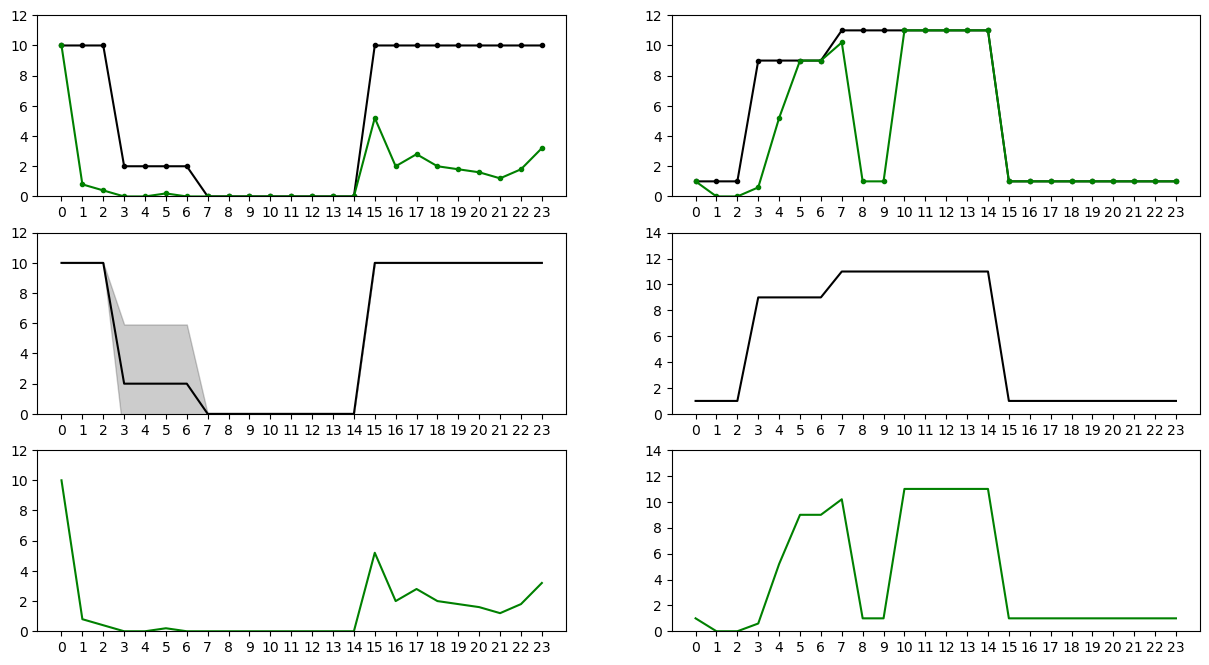

In [66]:
# Set up number of subplots and figure size
fig, ax = plt.subplots(3, 2, figsize=(15, 8))

# Mean lines
ax[0,0].plot(data['el-capacity-mean'], color='black', marker='.')
ax[0,0].plot(data['el-available-mean'], color='green', marker='.')
ax[1,0].plot(data['el-capacity-mean'], color='black')
ax[2,0].plot(data['el-available-mean'], color='green')
ax[0,1].plot(data['c-capacity-mean'], color='black', marker='.')
ax[0,1].plot(data['c-available-mean'], color='green', marker='.')
ax[1,1].plot(data['c-capacity-mean'], color='black')
ax[2,1].plot(data['c-available-mean'], color='green')

# Experimenting with adding confidence interval
add_ci(data['day-mean'], data['el-capacity-mean'], data['el-capacity-ci'],
       ax=ax[1,0], color='black', alpha=0.2)

# Set tick frequency and axis limits for subplots
plt.setp(ax, xticks=np.arange(0,24), ylim=(0,12), yticks=np.arange(0,14,2))
ax[1,1].set_ylim(0,14)
ax[1,1].set_yticks(np.arange(0, 16, 2))
ax[2,1].set_ylim(0,14)
ax[2,1].set_yticks(np.arange(0, 16, 2))

plt.show()